<a href="https://colab.research.google.com/github/Jass1313c/comp215/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime, json, requests
from pprint import pprint

param = { "format": "geojson", "starttime": "2024-03-10","limit": 20000, "endtime": "2024-05-30"}
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
response = requests.get(url, params=param)
data = json.loads(response.text)

pprint(data)

for feature in data['features']:
  depth = feature['geometry']['coordinates'][2]
  if depth < 10 and "Texas" in feature['properties']['place']:
    Latitude = feature['geometry']['coordinates'][1]
    Longitude = feature['geometry']['coordinates'][0]
    print(f"Mag: {feature['properties']['mag']},   Place: {feature['properties']['place']},   Time: {datetime.datetime.fromtimestamp(feature['properties']['time'] / 1000)},   Lat: {Latitude},   Long: {Longitude}")

In [2]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import datetime, json, requests
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from dataclasses import dataclass
import plotly.graph_objects as go
from pprint import pprint
import networkx as nx
import pandas as pd
import pyproj


In [ ]:
@dataclass
class Earthquake:
  Mag: float
  Place: str
  Time: datetime.datetime
  Lat: float
  Long: float
  Depth: float

param = { "format": "geojson", "starttime": "2024-03-14","limit": 20000, "endtime": "2024-06-15", "minmagnitude": 1}
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
response = requests.get(url, params=param)
data = json.loads(response.text)

def __init__(self, Mag, Place, Time, Lat, Long, Depth):
    self.Mag = Mag
    self.Place = Place
    self.Time = Time
    self.Lat = Lat
    self.Long = Long
    self.Depth = Depth

earthquake_data = [
    Earthquake(
        Mag=feature['properties']['mag'],
        Place=feature['properties']['place'],
        Time=datetime.datetime.fromtimestamp(feature['properties']['time'] / 1000),
        Lat=feature['geometry']['coordinates'][1],
        Long=feature['geometry']['coordinates'][0],
        Depth=feature['geometry']['coordinates'][2]
    )
    for feature in data['features']
    if feature['geometry']['coordinates'][2] < 10 and "Texas" in feature['properties']['place']
]

print(len(earthquake_data))

for quake in earthquake_data:
  pprint(quake)

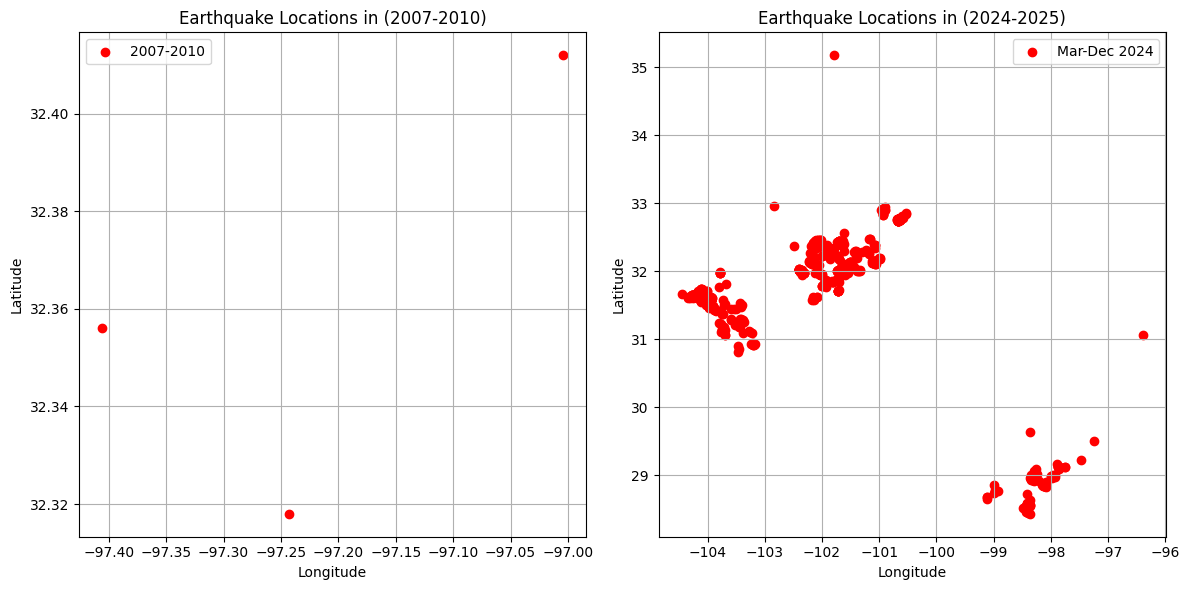

In [7]:
param1 = { "format": "geojson", "starttime": "2007-01-01","limit": 20000, "endtime": "2010-01-01", "minmagnitude": 1}
param2 = { "format": "geojson", "starttime": "2024-03-01","limit": 20000, "endtime": "2024-12-01", "minmagnitude": 1}
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

response1 = requests.get(url, params=param1)
response2 = requests.get(url, params=param2)
data1 = json.loads(response1.text)
data2 = json.loads(response2.text)

quake_data1 = [
  Earthquake(
  Mag=feature['properties']['mag'],
  Place=feature['properties']['place'],
  Time=datetime.datetime.fromtimestamp(feature['properties']['time'] / 1000),
  Lat=feature['geometry']['coordinates'][1],
  Long=feature['geometry']['coordinates'][0],
  Depth=feature['geometry']['coordinates'][2]
  )

  for feature in data1['features']
  if feature['geometry']['coordinates'][2] < 10 and "Texas" in feature['properties']['place']
]

quake_data2 = [
  Earthquake(
  Mag=feature['properties']['mag'],
  Place=feature['properties']['place'],
  Time= datetime.datetime.fromtimestamp(feature['properties']['time'] / 1000),
  Lat=feature['geometry']['coordinates'][1],
  Long=feature['geometry']['coordinates'][0],
  Depth=feature['geometry']['coordinates'][2]
  )
  for feature in data2['features']
  if feature['geometry']['coordinates'][2] < 10 and "Texas" in feature['properties']['place']
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter([eq.Long for eq in quake_data1], [eq.Lat for eq in quake_data1], color='red', label='2007-2010')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Earthquake Locations in (2007-2010)')
ax1.grid(True)
ax1.legend()

ax2.scatter([eq.Long for eq in quake_data2], [eq.Lat for eq in quake_data2], color='Red', label='Mar-Dec 2024' )
ax2.set_xlabel('Longitude')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Earthquake Locations in (2024-2025)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
file_path = '/content/drive/MyDrive/Fracking.csv'
fracking_df = pd.read_csv(file_path)

@dataclass
class FrackingData:
  DisclosureId: str
  JobStartDate: datetime.datetime
  JobEndDate: datetime.datetime
  StateName: str
  CountyName: str
  Latitude: float
  Longitude: float
  TVD_Km: float
  TotalBaseWaterVolume: float


  def __init__(self, DisclosureId, JobStartDate, JobEndDate, StateName, CountyName, Latitude, Longitude, TVD_Km, TotalBaseWaterVolume):
    self.DisclosureId = DisclosureId
    self.StateName = StateName
    self.CountyName = CountyName
    self.Latitude = Latitude
    self.Longitude = Longitude
    self.TVD_Km = TVD_Km
    self.TotalBaseWaterVolume = TotalBaseWaterVolume

    # Coordinate transformation
    source_crs = 'epsg:4269'  # NAD83
    target_crs = 'epsg:4326'  # WGS84
    transformer = pyproj.Transformer.from_crs(source_crs, target_crs)
    self.Latitude_WGS84, self.Longitude_WGS84 = transformer.transform(self.Latitude, self.Longitude)

    # Convert dates to datetime objects
    self.JobStartDate = pd.to_datetime(JobStartDate)
    self.JobEndDate = pd.to_datetime(JobEndDate)

# Create a list of FrackingData objects
fracking_data_list = []
for index, row in fracking_df.iterrows():
    # Create a dictionary with the required keys and values from the row
    data_dict = {
        'DisclosureId': row['DisclosureId'],
        'JobStartDate': row['JobStartDate'],
        'JobEndDate': row['JobEndDate'],
        'StateName': row['StateName'],
        'CountyName': row['CountyName'],
        'Latitude': row['Latitude'],
        'Longitude': row['Longitude'],
        'TVD_Km': row['TVD(Km)'],
        'TotalBaseWaterVolume': row['TotalBaseWaterVolume']
    }
    # Create a FrackingData object using the dictionary and add it to the list
    fracking_data_list.append(FrackingData(**data_dict))

# Print job start and end dates
for fracking_data in fracking_data_list:
    print(f"JobStartDate: {fracking_data.JobStartDate}, JobEndDate: {fracking_data.JobEndDate}")

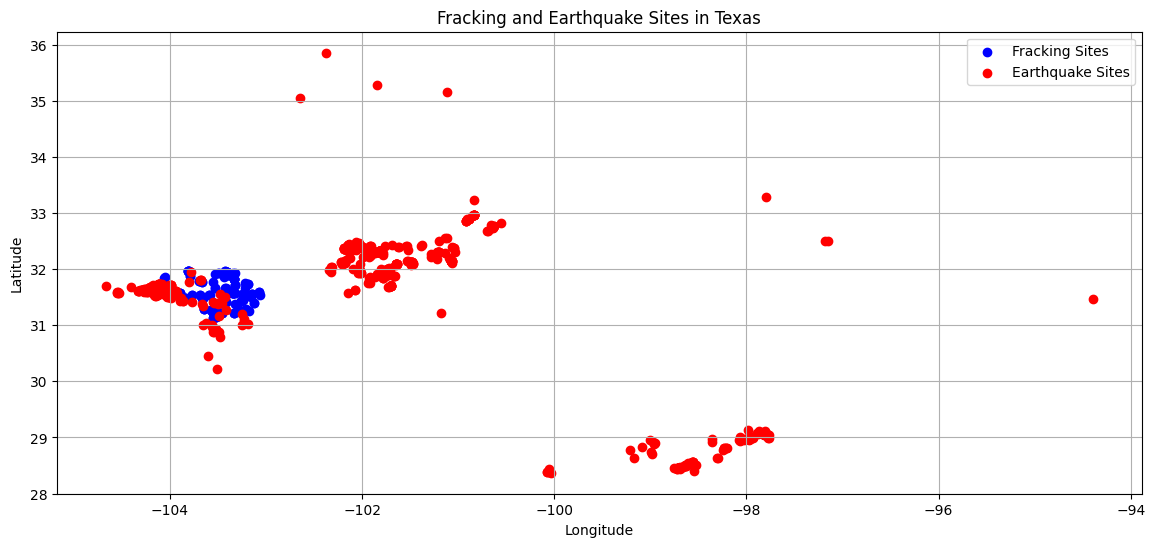

In [9]:
frac_lats = [site.Latitude_WGS84 for site in fracking_data_list]
frac_lons = [site.Longitude_WGS84 for site in fracking_data_list]


eq_lats = [eq.Lat for eq in earthquake_data]
eq_lons = [eq.Long for eq in earthquake_data]

plt.figure(figsize=(14, 6))


plt.scatter(frac_lons, frac_lats, color='blue', label='Fracking Sites')

plt.scatter(eq_lons, eq_lats, color='red', label='Earthquake Sites')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fracking and Earthquake Sites in Texas')
plt.grid(True)
plt.legend()
plt.show()

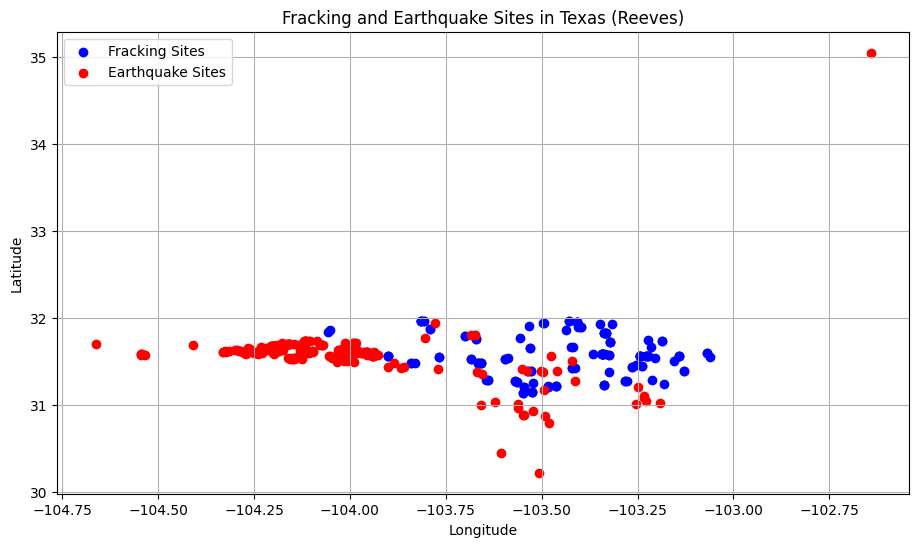

In [ ]:
filtered_earthquake_data = [eq for eq in earthquake_data if eq.Long < -102.5]

frac_lats = [site.Latitude_WGS84 for site in fracking_data_list]
frac_lons = [site.Longitude_WGS84 for site in fracking_data_list]


eq_lats = [eq.Lat for eq in filtered_earthquake_data]
eq_lons = [eq.Long for eq in filtered_earthquake_data]

plt.figure(figsize=(11, 6))
plt.scatter(frac_lons, frac_lats, color='blue', label='Fracking Sites')
plt.scatter(eq_lons, eq_lats, color='red', label='Earthquake Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fracking and Earthquake Sites in Texas (Reeves)')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
frac_site = fracking_data_list[49]
frac_site_surface_coords = (frac_site.Latitude_WGS84, frac_site.Longitude_WGS84, 0)  # Surface coordinates (z=0)
frac_site_depth_coords = (frac_site.Latitude_WGS84, frac_site.Longitude_WGS84, frac_site.TVD_Km)


graph = nx.Graph()
graph.add_node("Fracking Site (Surface)", pos=frac_site_surface_coords)

graph.add_node("Fracking Depth", pos=frac_site_depth_coords)

graph.add_edge("Fracking Site (Surface)", "Fracking Depth")

for eq in earthquake_data:
    eq_coords = (eq.Lat, eq.Long, 0)  # Earthquake surface coordinates (z=0)
    graph.add_node(f"Earthquake Site {eq.Place}", pos=eq_coords)

# Get node positions and invert z-coordinates
pos = nx.get_node_attributes(graph, 'pos')
for node, coords in pos.items():
    pos[node] = (coords[0], coords[1], -coords[2])

# Get earthquake magnitudes and create color scale
eq_magnitudes = [eq.Mag for eq in earthquake_data if f"Earthquake Site {eq.Place}" in graph.nodes()]
color_scale = plt.cm.get_cmap('viridis', len(eq_magnitudes))

# Create Plotly traces for nodes and edges
node_trace = go.Scatter3d(
    x=[pos[node][0] for node in graph.nodes()],
    y=[pos[node][1] for node in graph.nodes()],
    z=[pos[node][2] for node in graph.nodes()],
    mode='markers',
    marker=dict(
        size=5,
        color=[color_scale(i) if 'Earthquake Site' in node else 'blue' for i, node in enumerate(graph.nodes())],
        colorscale='Viridis',
        colorbar=dict(title='Magnitude')
    ),
    text=list(graph.nodes()),
    hoverinfo='text'
)

edge_trace = go.Scatter3d(
    x=[], y=[], z=[],
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

for edge in graph.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    edge_trace['z'] += tuple([z0, z1, None])

# Create the Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Fracking Site, Depth, and Nearby Earthquake (3D Movable)",
                    scene=dict(
                        xaxis_title="Longitude",
                        yaxis_title="Latitude",
                        zaxis_title="Depth (km)",
                        xaxis=dict(  # X-axis background color
                            backgroundcolor="rgb(200, 200, 230)",
                            gridcolor="white",
                            showbackground=True,
                            zerolinecolor="white"
                        ),
                        yaxis=dict(  # Y-axis background color
                            backgroundcolor="rgb(230, 200, 230)",
                            gridcolor="white",
                            showbackground=True,
                            zerolinecolor="white"
                        ),
                        zaxis=dict(  # Z-axis background color
                            backgroundcolor="rgb(230, 230, 200)",
                            gridcolor="white",
                            showbackground=True,
                            zerolinecolor="white"
                        )
                        # aspectratio=dict(x=1, y=1, z=0.7),
                        # camera=dict(
                        #     eye=dict(x=1.4, y=1.4, z=1.25)
                        # )
                    ),
                    showlegend=True,
                )
                )


fig.show()

<ipython-input-10-2b506e8bf8d8>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_scale = plt.cm.get_cmap('viridis', len(eq_magnitudes))


In [11]:

# Assuming you have 'fracking_data_list' and 'earthquake_data' loaded

# Choose a specific fracking site (e.g., the 50th one, using index 49)
frac_site = fracking_data_list[49]
frac_site_surface_coords = (frac_site.Latitude_WGS84, frac_site.Longitude_WGS84, 0)  # Surface coordinates (z=0)
frac_site_depth_coords = (frac_site.Latitude_WGS84, frac_site.Longitude_WGS84, frac_site.TVD_Km)

# Create a graph
graph = nx.Graph()

# Add the fracking site (surface) as a node
graph.add_node("Fracking Site (Surface)", pos=frac_site_surface_coords)

# Add the fracking depth as a node
graph.add_node("Fracking Depth", pos=frac_site_depth_coords)

# Connect the fracking site (surface) to the fracking depth
graph.add_edge("Fracking Site (Surface)", "Fracking Depth")

# Add earthquake site nodes and connect if within radius
radius = 20  # 20 km radius
for eq in earthquake_data:
    eq_coords = (eq.Lat, eq.Long, 0)  # Earthquake surface coordinates (z=0)
    distance_to_frac_site = geodesic(frac_site_surface_coords[:2], eq_coords[:2]).kilometers  # Calculate horizontal distance

    if distance_to_frac_site <= radius:
        graph.add_node(f"Earthquake Site {eq.Place}", pos=eq_coords)
        graph.add_edge("Fracking Site (Surface)", f"Earthquake Site {eq.Place}")  # Connect if within radius

# Get node positions and invert z-coordinates
pos = nx.get_node_attributes(graph, 'pos')
for node, coords in pos.items():
    pos[node] = (coords[0], coords[1], -coords[2])

# Get earthquake magnitudes and create color scale
eq_magnitudes = [eq.Mag for eq in earthquake_data if f"Earthquake Site {eq.Place}" in graph.nodes()]
color_scale = plt.cm.get_cmap('viridis', len(eq_magnitudes))

# Create Plotly traces for nodes and edges
node_trace = go.Scatter3d(
    x=[pos[node][0] for node in graph.nodes()],
    y=[pos[node][1] for node in graph.nodes()],
    z=[pos[node][2] for node in graph.nodes()],
    mode='markers',
    marker=dict(
        size=5,
        color=[color_scale(i) if 'Earthquake Site' in node else 'blue' for i, node in enumerate(graph.nodes())],
        colorscale='Viridis',
        colorbar=dict(title='Magnitude')
    ),
    text=list(graph.nodes()),
    hoverinfo='text'
)

edge_trace = go.Scatter3d(
    x=[], y=[], z=[],
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

for edge in graph.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    edge_trace['z'] += tuple([z0, z1, None])

# Create the Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Fracking Site, Depth, and Nearby Earthquakes within 20km Radius (3D Movable)",
                    scene=dict(
                        xaxis_title="Longitude",
                        yaxis_title="Latitude",
                        zaxis_title="Depth (km)"
                    ),
                    showlegend=True
                )
                )

fig.show()

<ipython-input-11-cfeb7fd290ff>:37: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



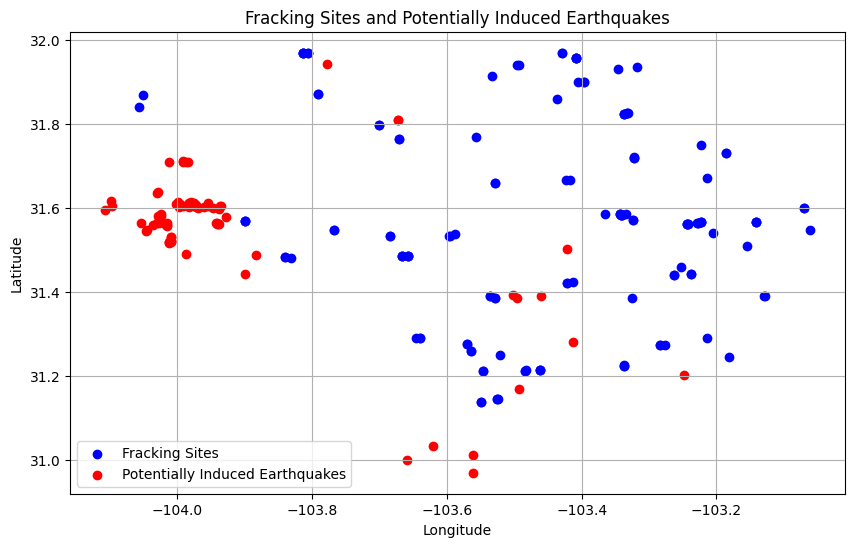

In [ ]:
import datetime
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# ... (Your existing class definitions for FrackingData and Earthquake) ...

class EarthquakeAnalysis:
    def __init__(self, fracking_data, earthquake_data, radius_km=20, time_window_days=30):
        self.fracking_data = fracking_data
        self.earthquake_data = earthquake_data
        self.radius_km = radius_km
        self.time_window_days = time_window_days
        self.potentially_induced_earthquakes = []

    def find_potentially_induced_earthquakes(self):
        for eq in self.earthquake_data:
            for frac_site in self.fracking_data:
                distance = geodesic((frac_site.Latitude_WGS84, frac_site.Longitude_WGS84),
                                    (eq.Lat, eq.Long)).kilometers
                if distance <= self.radius_km:
                    if frac_site.JobStartDate - datetime.timedelta(days=1) <= eq.Time <= frac_site.JobEndDate + datetime.timedelta(days=self.time_window_days - 1):
                        self.potentially_induced_earthquakes.append(eq)
                        break  # Move to the next earthquake

    def visualize_earthquakes(self):
        plt.figure(figsize=(10, 6))

        plt.scatter([site.Longitude_WGS84 for site in self.fracking_data],
                    [site.Latitude_WGS84 for site in self.fracking_data],
                    color='blue', label='Fracking Sites')

        plt.scatter([eq.Long for eq in self.potentially_induced_earthquakes],
                    [eq.Lat for eq in self.potentially_induced_earthquakes],
                    color='red', label='Potentially Induced Earthquakes')

        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Fracking Sites and Potentially Induced Earthquakes')
        plt.grid(True)
        plt.legend()
        plt.show()
analysis = EarthquakeAnalysis(fracking_data_list, earthquake_data)
analysis.find_potentially_induced_earthquakes()
analysis.visualize_earthquakes()

Highest base water fracking site (DisclosureId): 9916a7d9-fc64-4c58-af09-708d69fdd9b1
Number of earthquakes within 50 km: 21
Distance bins (midpoints): [ 5. 15. 25. 35. 45.]
Earthquake counts per bin: [1 2 4 7 7]
Pearson correlation coefficient: 0.9686648999069223
P-value: 0.006627177487725374


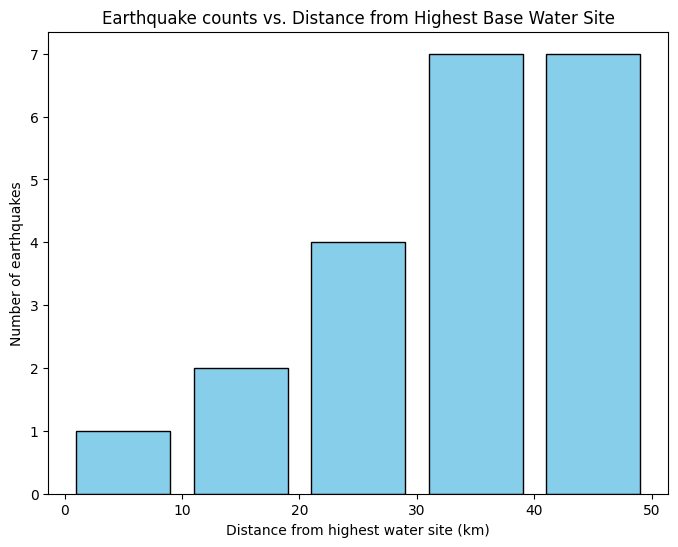

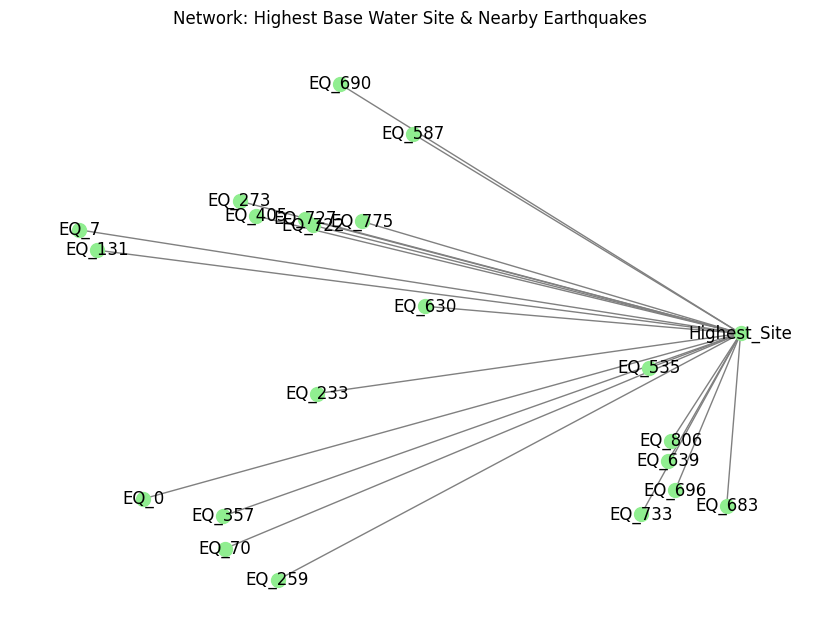

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import networkx as nx
from scipy.stats import pearsonr
from dataclasses import dataclass

# Assume these dataclasses are already defined and your data is loaded:
@dataclass
class Earthquake:
    Mag: float
    Place: str
    Time: datetime.datetime
    Lat: float
    Long: float
    Depth: float

@dataclass
class FrackingData:
    DisclosureId: str
    JobStartDate: pd.Timestamp
    JobEndDate: pd.Timestamp
    StateName: str
    CountyName: str
    Latitude: float
    Longitude: float
    TVD_Km: float
    TotalBaseWaterVolume: float
    Latitude_WGS84: float
    Longitude_WGS84: float

# ------------------------------------------------------------------
# STEP 1: Identify the highest base water fracking site
# ------------------------------------------------------------------
# Assume fracking_data_list is a list of FrackingData objects.
highest_site = max(fracking_data_list, key=lambda site: site.TotalBaseWaterVolume)
site_coords = (highest_site.Latitude_WGS84, highest_site.Longitude_WGS84)
print("Highest base water fracking site (DisclosureId):", highest_site.DisclosureId)

# ------------------------------------------------------------------
# STEP 2: Compute distances of nearby earthquakes
# ------------------------------------------------------------------
max_distance = 50  # in km, consider earthquakes within 50 km
distances = []     # to store distances from the highest site for earthquakes

# Assume earthquake_data is a list of Earthquake objects.
for eq in earthquake_data:
    dist = geodesic(site_coords, (eq.Lat, eq.Long)).kilometers
    if dist <= max_distance:
        distances.append(dist)

print("Number of earthquakes within", max_distance, "km:", len(distances))

# ------------------------------------------------------------------
# STEP 3: Bin the distances and count earthquakes per bin
# ------------------------------------------------------------------
bins = np.arange(0, max_distance + 10, 10)  # e.g., edges at 0,10,20,...,50 km
bin_counts, bin_edges = np.histogram(distances, bins=bins)
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

print("Distance bins (midpoints):", bin_midpoints)
print("Earthquake counts per bin:", bin_counts)

# ------------------------------------------------------------------
# STEP 4: Compute a simple Pearson correlation between distance and counts
# ------------------------------------------------------------------
corr_coef, p_value = pearsonr(bin_midpoints, bin_counts)
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# ------------------------------------------------------------------
# STEP 5: Plot the binned earthquake counts vs. distance
# ------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.bar(bin_midpoints, bin_counts, width=8, align='center', color='skyblue', edgecolor='black')
plt.xlabel("Distance from highest water site (km)")
plt.ylabel("Number of earthquakes")
plt.title("Earthquake counts vs. Distance from Highest Base Water Site")
plt.show()

# ------------------------------------------------------------------
# Optional: Create a simple network visualization with NetworkX
# ------------------------------------------------------------------
G = nx.Graph()
# Add the highest water fracking site as the central node
G.add_node("Highest_Site", pos=(highest_site.Longitude_WGS84, highest_site.Latitude_WGS84))

# For each nearby earthquake, add a node and an edge from the highest site
for i, eq in enumerate(earthquake_data):
    dist = geodesic(site_coords, (eq.Lat, eq.Long)).kilometers
    if dist <= max_distance:
        node_id = f"EQ_{i}"
        # Using (Longitude, Latitude) for plotting
        G.add_node(node_id, pos=(eq.Long, eq.Lat), distance=dist)
        G.add_edge("Highest_Site", node_id)

# Get positions and draw the network
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightgreen', edge_color='gray')
plt.title("Network: Highest Base Water Site & Nearby Earthquakes")
plt.show()



In [23]:
radius_threshold_km = 10  # Horizontal radius threshold in km
time_window_days = 10     # Time window days after JobEndDate

results = {}

# Enumerate over fracking sites to use the site index in the key (e.g., "loc[3]")
for i, site in enumerate(fracking_data_list):
    site_results = []
    # Use the site's WGS84 coordinates for horizontal distance calculation
    site_coords = (site.Latitude_WGS84, site.Longitude_WGS84)

    for eq in earthquake_data:
        # Calculate horizontal distance (km) between the site and the earthquake
        horizontal_dist = geodesic(site_coords, (eq.Lat, eq.Long)).kilometers

        if horizontal_dist <= radius_threshold_km:
            # Define time window:
            lower_time_bound = site.JobStartDate - datetime.timedelta(days=1)
            upper_time_bound = site.JobStartDate + datetime.timedelta(days=time_window_days - 1)

            if lower_time_bound <= eq.Time <= upper_time_bound:
                # Compute the vertical (depth) difference
                depth_diff = abs(eq.Depth - site.TVD_Km)

                eq_details = {
                    'earthquake_place': eq.Place,
                    'horizontal_distance_km': horizontal_dist,
                    'depth_difference': depth_diff,
                    'earthquake_depth': eq.Depth,
                    'earthquake_coordinates': (eq.Lat, eq.Long),
                    'frc_site_coordinates': (site.Latitude_WGS84, site.Longitude_WGS84),
                    'frackingWatervolume': site.TotalBaseWaterVolume,
                    'fracking_depth': site.TVD_Km,
                    'earthquake_time': eq.Time
                }
                site_results.append(eq_details)

    # Only store the site if there is at least one matching earthquake, using "loc[i]" as key.
    if site_results:
        results[f"loc[{i}]"] = site_results

# Calculate total number of earthquakes across all sites
total_earthquakes = sum(len(eq_list) for eq_list in results.values())

# Print the complete results dictionary (only sites with matching earthquakes) and the total count.
pprint.pprint(results)
print("Total earthquakes:", total_earthquakes)


{'loc[56]': [{'depth_difference': 4.3943860400000005,
              'earthquake_coordinates': (31.606, -103.976),
              'earthquake_depth': 7.6379,
              'earthquake_place': '36 km NNW of Toyah, Texas',
              'earthquake_time': datetime.datetime(2024, 4, 21, 23, 11, 40, 544000),
              'frackingWatervolume': 20313720.0,
              'fracking_depth': 3.24351396,
              'frc_site_coordinates': (31.569435, -103.89958),
              'horizontal_distance_km': 8.309493340738548},
             {'depth_difference': 4.00748604,
              'earthquake_coordinates': (31.609, -103.978),
              'earthquake_depth': 7.251,
              'earthquake_place': '37 km NNW of Toyah, Texas',
              'earthquake_time': datetime.datetime(2024, 4, 21, 20, 30, 50, 893000),
              'frackingWatervolume': 20313720.0,
              'fracking_depth': 3.24351396,
              'frc_site_coordinates': (31.569435, -103.89958),
              'horizontal_dis

In [62]:
import math
import pprint

def calculate_isi(event):
    V = event['frackingWatervolume']
    D = event['horizontal_distance_km']
    delta = event['depth_difference']
    # Avoid division by zero
    if D * delta != 0:
        return math.log10(V) / (D * delta)
    else:
        return None

isi_results = {}

# 'results' is the dictionary from your code containing the earthquake matches.
for site, events in results.items():
    site_isi = []
    for event in events:
        isi = calculate_isi(event)
        site_isi.append({
            'earthquake_place': event['earthquake_place'],
            'earthquake_coordinates': event['earthquake_coordinates'],
            'ISI': isi
        })
    isi_results[site] = site_isi

pprint.pprint(isi_results)


{'loc[56]': [{'ISI': 0.20013049812053305,
              'earthquake_coordinates': (31.606, -103.976),
              'earthquake_place': '36 km NNW of Toyah, Texas'},
             {'ISI': 0.21106575477784248,
              'earthquake_coordinates': (31.609, -103.978),
              'earthquake_place': '37 km NNW of Toyah, Texas'},
             {'ISI': 0.2714927493240965,
              'earthquake_coordinates': (31.603, -103.997),
              'earthquake_place': '37 km NNW of Toyah, Texas'},
             {'ISI': 0.5143993012104661,
              'earthquake_coordinates': (31.605, -103.937),
              'earthquake_place': '33 km WSW of Mentone, Texas'},
             {'ISI': 0.28215062208680464,
              'earthquake_coordinates': (31.488, -103.884),
              'earthquake_place': '21 km NNW of Toyah, Texas'},
             {'ISI': 0.36355924878969775,
              'earthquake_coordinates': (31.604, -103.936),
              'earthquake_place': '33 km WSW of Mentone, Texas'},
  

In [20]:
import math
import pprint

# Define weighting parameters for distance and depth difference
alpha = 0.5  # weight for horizontal distance
beta = 0.  # weight for depth difference

def calculate_isi_linear(event):
    V = event['frackingWatervolume']
    D = event['horizontal_distance_km']
    delta = event['depth_difference']
    # Compute the index using the second formula
    return math.log10(V) - (alpha * D) - (beta * delta)

isi_results_linear = {}

# 'results' is the dictionary from your code containing the earthquake matches.
for site, events in results.items():
    site_isi = []
    for event in events:
        isi = calculate_isi_linear(event)
        site_isi.append({
            'earthquake_place': event['earthquake_place'],
            'Coordinates': event['earthquake_coordinates'],
            'ISI': isi
        })
    isi_results_linear[site] = site_isi

pprint.pprint(isi_results_linear)


{'loc[56]': [{'Coordinates': (31.606, -103.976),
              'ISI': 3.1530427915651007,
              'earthquake_place': '36 km NNW of Toyah, Texas'},
             {'Coordinates': (31.609, -103.978),
              'ISI': 2.9879636233952924,
              'earthquake_place': '37 km NNW of Toyah, Texas'},
             {'Coordinates': (31.603, -103.997),
              'ISI': 2.324043932868184,
              'earthquake_place': '37 km NNW of Toyah, Texas'},
             {'Coordinates': (31.605, -103.937),
              'ISI': 4.654248608545917,
              'earthquake_place': '33 km WSW of Mentone, Texas'},
             {'Coordinates': (31.488, -103.884),
              'ISI': 2.732871444848458,
              'earthquake_place': '21 km NNW of Toyah, Texas'},
             {'Coordinates': (31.604, -103.936),
              'ISI': 4.727196366543941,
              'earthquake_place': '33 km WSW of Mentone, Texas'},
             {'Coordinates': (31.602, -103.961),
              'ISI': 3.8791

In [30]:
import math

# Weighting parameters
alpha = 0.1  # weight for horizontal distance
beta = 0.5   # weight for depth difference

def calculate_isi_linear(event):
    V = event['frackingWatervolume']
    D = event['horizontal_distance_km']
    delta = event['depth_difference']
    return math.log10(V) - (alpha * D) - (beta * delta)

# Variables to track the highest ISI and corresponding event
highest_isi = -float('inf')
highest_event = None
highest_site = None

# Iterate through each site and event in the results
for site, events in results.items():
    for event in events:
        isi = calculate_isi_linear(event)
        if isi is not None and isi > highest_isi:
            highest_isi = isi
            highest_event = event
            highest_site = site

print("Highest ISI:", highest_isi)
print("From site:", highest_site)
print("Event details:")
print(highest_event)


Highest ISI: 5.497700279245331
From site: loc[57]
Event details:
{'earthquake_place': '33 km WSW of Mentone, Texas', 'horizontal_distance_km': 5.303272210386226, 'depth_difference': 2.593892048, 'earthquake_depth': 5.9204, 'earthquake_coordinates': (31.605, -103.937), 'frc_site_coordinates': (31.569435, -103.89964), 'frackingWatervolume': 21133602.0, 'fracking_depth': 3.326507952, 'earthquake_time': datetime.datetime(2024, 4, 19, 2, 34, 59, 666000)}


In [38]:
import networkx as nx
import plotly.graph_objects as go

# Assume 'results' is your dictionary and we use only loc[57] data.
loc57_data = results["loc[57]"]

# Define the actual fracking site coordinate (latitude, longitude)
# Replace these with the actual fracking site coordinates.
frc_coord = highest_site_data[0]['frc_site_coordinates']
frc_depth = highest_site_data[0]['fracking_depth']

# Create a new NetworkX graph.
graph = nx.Graph()

# Add the fracking site (surface) node using its actual coordinate with z = 0.
# Note: When plotting, we use (longitude, latitude, z).
graph.add_node("Fracking Site (Surface)", pos=(fracking_site_coord[1], fracking_site_coord[0], 0))

# Add each earthquake node and connect it to the fracking site.
for event in loc57_data:
    node_name = f"Earthquake Site {event['earthquake_place']}"
    # Use the earthquake's actual coordinates.
    lat, lon = event['earthquake_coordinates']
    depth = event['earthquake_depth']
    graph.add_node(node_name, pos=(lon, lat, depth))
    # Connect the earthquake node to the fracking site.
    graph.add_edge("Fracking Site (Surface)", node_name, weight=event['horizontal_distance_km'])

# Retrieve node positions and invert z-coordinates so depth appears positive downward.
pos = nx.get_node_attributes(graph, 'pos')
for node, coords in pos.items():
    pos[node] = (coords[0], coords[1], -coords[2])
nx.set_node_attributes(graph, pos, 'pos')

# Create Plotly traces for nodes and edges.
node_trace = go.Scatter3d(
    x=[pos[node][0] for node in graph.nodes()],
    y=[pos[node][1] for node in graph.nodes()],
    z=[pos[node][2] for node in graph.nodes()],
    mode='markers+text',
    marker=dict(
        size=8,
        color=['blue' if node == "Fracking Site (Surface)" else 'red' for node in graph.nodes()]
    ),
    text=list(graph.nodes()),
    hoverinfo='text'
)

edge_x = []
edge_y = []
edge_z = []
for edge in graph.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

# Create and show the Plotly figure.
# Note: Here we switch the axis titles so that:
# - x-axis becomes "Latitude"
# - y-axis becomes "Longitude"
# - z-axis remains "Depth (km)"
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Loc[57] Fracking Site (Surface) and Associated Earthquakes (3D)",
                    scene=dict(
                        xaxis_title="Latitude",
                        yaxis_title="Longitude",
                        zaxis_title="Depth (km)",
                        xaxis=dict(autorange=True),
                        yaxis=dict(autorange=True),
                        zaxis=dict(autorange='reversed')  # Ensure deeper depths plot downward
                    ),
                    showlegend=False
                )
)
fig.show()


In [51]:
import networkx as nx
import plotly.graph_objects as go

# Use highest_site_data from your previous ISI calculation.
highest_site_data = results[highest_site]

# Set the fracking site's coordinate and depth.
frc_coord = highest_site_data[0]['frc_site_coordinates']  # (lat, lon)
frc_depth = highest_site_data[0]['fracking_depth']

# Create a new NetworkX graph.
graph = nx.Graph()

# Add the fracking site depth node using its actual coordinate and depth.
graph.add_node("Fracking Site(Depth)", pos=(frc_coord[1], frc_coord[0], frc_depth))
# Add the fracking site surface node at depth 0.
graph.add_node("Fracking Site(Surface)", pos=(frc_coord[1], frc_coord[0], 0))
# Connect the two (vertical edge).
vertical_distance = abs(frc_depth - 0)
graph.add_edge("Fracking Site(Depth)", "Fracking Site(Surface)", weight=vertical_distance)

# Add each earthquake node using its actual coordinates and earthquake depth.
for event in highest_site_data:
    node_name = f"{event['earthquake_place']}"
    lat, lon = event['earthquake_coordinates']
    depth = event['earthquake_depth']
    graph.add_node(node_name, pos=(lon, lat, depth))
    # Connect each earthquake node to the fracking site depth node.
    graph.add_edge("Fracking Site(Depth)", node_name, weight=event['horizontal_distance_km'])

# Retrieve node positions.
pos = nx.get_node_attributes(graph, 'pos')

# Invert the z-coordinate so that the surface (0) appears at the top.
for node, coords in pos.items():
    pos[node] = (coords[0], coords[1], -coords[2])
nx.set_node_attributes(graph, pos, 'pos')

# Separate the nodes into two groups for legend purposes.
frac_nodes = [node for node in graph.nodes() if "Fracking Site" in node]
eq_nodes = [node for node in graph.nodes() if "Fracking Site" not in node]

# Create separate traces for fracking site nodes and earthquake nodes.
frac_trace = go.Scatter3d(
    x=[pos[node][0] for node in frac_nodes],
    y=[pos[node][1] for node in frac_nodes],
    z=[pos[node][2] for node in frac_nodes],
    mode='markers+text',
    marker=dict(size=10, color='blue'),
    text=frac_nodes,
    name="Fracking Site",
    hoverinfo='text'
)

eq_trace = go.Scatter3d(
    x=[pos[node][0] for node in eq_nodes],
    y=[pos[node][1] for node in eq_nodes],
    z=[pos[node][2] for node in eq_nodes],
    mode='markers+text',
    marker=dict(size=8, color='red'),
    text=eq_nodes,
    name="Earthquake Sites",
    hoverinfo='text'
)

# Create edge trace (shared by all).
edge_x, edge_y, edge_z = [], [], []
for edge in graph.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none',
    showlegend=False
)

# Create and show the Plotly figure.
fig = go.Figure(data=[edge_trace, frac_trace, eq_trace],
                layout=go.Layout(
                    title="3D Plot: Fracking Site Depth, Surface & Associated Earthquake Depths",
                    scene=dict(
                        xaxis_title="Longitude",
                        yaxis_title="Latitude",
                        zaxis_title="Depth (km)"
                    ),
                    legend=dict(x=0.02, y=0.98)
                )
)
fig.show()
